# 記述統計とグラフ

**Anscombeのデータセット**
* 4つのデータセット
    * それぞれ変数は`x`と`y`の2つ
* 全てのデータセットで以下が殆ど同じ
    * `x`と`y`の平均（mean）
    * `x`と`y`の標準偏差（standard deviation）
    * `x`と`y`の相関係数（correlation coefficient）
    * 回帰線（regression line）
    * 決定係数（coefficient of determination, $R^2$）
* 図示（散布図）すると大きく異なる

---
**＜含意＞**

データセットの質的な違いは記述統計だけでは確認できない。図示することが重要。

ここでは`matplotlib`に基づいた`seaborn`パッケージを使う。このパッケージを使うことにより，`matplotlib`よりも簡単に，更により綺麗にできるようになる。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

Anscombeのデータセット

In [2]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

df1 = pd.DataFrame({'x':x1, 'y':y1})  # Dataset 1
df2 = pd.DataFrame({'x':x2, 'y':y2})  # Dataset 2
df3 = pd.DataFrame({'x':x3, 'y':y3})  # Dataset 3
df4 = pd.DataFrame({'x':x4, 'y':y4})  # Dataset 4

散布図

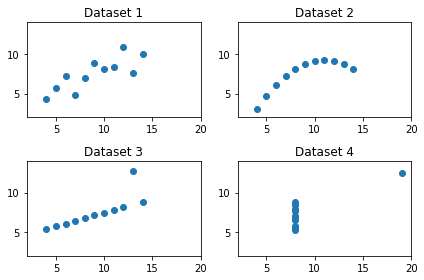

In [3]:
ax1 = plt.subplot(221)  # ax1に図の座標の情報を挿入
plt.scatter('x', 'y', data=df1)
plt.xlim(2,20)  # 横軸の表示範囲
plt.ylim(2,14)  # 縦軸の表示範囲
plt.title('Dataset 1')

plt.subplot(222, sharex= ax1, sharey=ax1)  # ax1の座標と同じに設定
plt.scatter('x', 'y', data=df2)
plt.title('Dataset 2')

plt.subplot(223, sharex= ax1, sharey=ax1)  # ax1の座標と同じに設定
plt.scatter('x', 'y', data=df3)
plt.title('Dataset 3')

plt.subplot(224, sharex= ax1, sharey=ax1)  # ax1の座標と同じに設定
plt.scatter('x', 'y', data=df4)
plt.title('Dataset 4')

plt.tight_layout()  # レイアウトを見やすく調整
pass

平均

In [4]:
df_list = [df1, df2, df3, df4]

for df in df_list:
    print('x:',df['x'].mean(), '    ', 'y:',df['y'].mean())

x: 9.0      y: 7.500909090909093
x: 9.0      y: 7.50090909090909
x: 9.0      y: 7.5
x: 9.0      y: 7.500909090909091


標準偏差

In [5]:
for df in df_list:
    print('x:',df['x'].std(), '    ', 'y:',df['y'].std())

x: 3.3166247903554      y: 2.031568135925815
x: 3.3166247903554      y: 2.0316567355016177
x: 3.3166247903554      y: 2.030423601123667
x: 3.3166247903554      y: 2.0305785113876023


相関係数

In [6]:
for df in df_list:
    print(df.corr().iloc[0,1])

0.81642051634484
0.8162365060002428
0.8162867394895981
0.8165214368885028


回帰直線の係数の推定値

In [7]:
b0hat = []  # 切片の推定値を入れる空のリスト
b1hat = []  # スロープの推定値を入れる空のリスト

for df in df_list:
    mod = ols('y ~ x', data=df).fit()  # OLSの推定
    b0hat.append(mod.params[0])         # 空のリストに推定値を追加
    b1hat.append(mod.params[1])         # 空のリストに推定値を追加
    print('b0:',mod.params[0], '    ', 'b1:',mod.params[1])

b0: 3.0000909090909085      b1: 0.5000909090909091
b0: 3.0009090909090905      b1: 0.5
b0: 3.0024545454545453      b1: 0.49972727272727285
b0: 3.0017272727272752      b1: 0.49990909090909075


回帰直線の図示

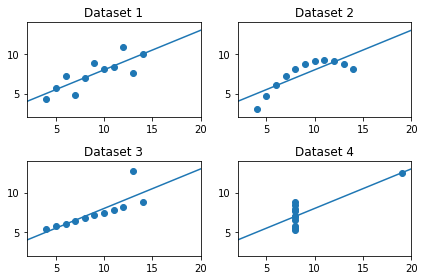

In [8]:
xx = np.linspace(2,20,100)  # 回帰直線を描くための横軸の値

ax1 = plt.subplot(221)
plt.plot(xx,b0hat[0]+b1hat[0]*xx)  # 回帰直線
plt.scatter('x', 'y', data=df1)
plt.xlim(2,20)
plt.ylim(2,14)
plt.title('Dataset 1')

plt.subplot(222, sharex= ax1, sharey=ax1)
plt.plot(xx,b0hat[1]+b1hat[1]*xx)  # 回帰直線
plt.scatter('x', 'y', data=df2)
plt.title('Dataset 2')

plt.subplot(223, sharex= ax1, sharey=ax1)
plt.plot(xx,b0hat[2]+b1hat[2]*xx)  # 回帰直線
plt.scatter('x', 'y', data=df3)
plt.title('Dataset 3')

plt.subplot(224, sharex= ax1, sharey=ax1)
plt.plot(xx,b0hat[3]+b1hat[3]*xx)  # 回帰直線
plt.scatter('x', 'y', data=df4)
plt.title('Dataset 4')

plt.tight_layout()
pass

決定係数

In [9]:
for df in df_list:
    mod = ols('y ~ x', data=df).fit()
    print('R^2:',mod.rsquared)

R^2: 0.666542459508775
R^2: 0.6662420337274844
R^2: 0.6663240410665593
R^2: 0.6667072568984653
